# 启动graphlab create

In [1]:
import graphlab

# 读取房屋销售数据

In [2]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to XiaoFei-97@outlook.com and will expire on October 02, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\WINDOWS\TEMP\graphlab_server_1538540879.log.0


In [3]:
sales

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000 |    3     |     2     |     1680    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000 |    4     |    4.5    |     5420    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500 |    3     |    2.25   |     1715    |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850 |    3     |    1.5    |     1060    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500 |    3     |     1     |     1780    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000 |    3     |    2.5    |     1890    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |   1    |     0      |  0   |     3     |   6   |    770     |       0       |
|   5000   |   1    |     0      |  0   |     5     |   7   |    1050    |      910      |
|   8080   |   1    |     0      |  0   |     3     |   8   |    1680    |       0       |
|  101930  |   1    |     0      |  0   |     3     |   11  |    3890    |      1530     |
|   6819   |   2    |     0      |  0   |     3     |   7   |    1715    |       0       |
|   9711   |   1    |     0      |  0   |     3     |   7   |    1060    |       0       |
|   7470   |   1    |     0      |  0   |     3     |   7   |    1050    |      730      |
|   6560   |   2    |     0      |  0   |     3     |   7   |    1890    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1933   |      0       |  98028  | 47.73792661 | -122.23319601 |     2720.0    | ... |
|   1965   |      0       |  98136  |   47.52082  | -122.39318505 |     1360.0    | ... |
|   1987   |      0       |  98074  | 47.61681228 | -122.04490059 |     1800.0    | ... |
|   2001   |      0       |  98053  | 47.65611835 | -122.00528655 |     4760.0    | ... |
|   1995   |      0       |  98003  | 47.30972002 | -122.32704857 |     2238.0    | ... |
|   1963   |      0       |  98198  | 47.40949984 | -122.31457273 |     1650.0    | ... |
|   1960   |      0       |  98146  | 47.51229381 | -122.33659507 |     1780.0    | ... |
|   2003   |      0       |  98038  | 47.36840673 |  -122

In [5]:
graphlab.canvas.set_target('ipynb') # 将生成的图片展示在jupyter中

In [9]:
sales.show(view="Scatter Plot",x="sqft_living", y="price") # 画散点图

# 分离出训练集和测试集

In [18]:
train_data, test_data = sales.random_split(0.8, seed=0)  # 将数据集随机划分,0.8表示随机百分之八十划分为训练集。剩下百分之二十位测试集，seed=0表示将划分确定

## 构建回归模型

In [16]:
sqft_model = graphlab.linear_regression.create(train_data, target="price", features=["sqft_living"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16542

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.102511     | 4347373.632024     | 2281153.308508       | 262643.709810 | 268770.190492   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# 评估这个简单的线性回归模型

In [19]:
print test_data['price'].mean()  # 均值

543054.042563


In [20]:
print sqft_model.evaluate(test_data)

{'max_error': 4141899.108724547, 'rmse': 255198.5173749575}


# 查看预测效果

In [24]:
import matplotlib.pyplot as plt

###  使绘制的图片在当前notebook显示

In [28]:
%matplotlib inline

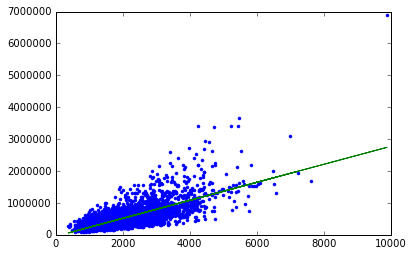

In [31]:
plt.plot(test_data["sqft_living"], test_data["price"], '.',
        test_data["sqft_living"], sqft_model.predict(test_data), '-')

In [34]:
sqft_model.get('coefficients')  # 显示截距与斜率

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -47735.6663956 | 5049.53441257 |
| sqft_living |  None | 282.187720695  | 2.22337184786 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

# 探索数据集的其他特征

In [35]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode'] # 卧室，浴室，房屋大小，客厅大小，楼层，地区码

In [36]:
sales[my_features].show()

In [41]:
sales.show(view="BoxWhisker Plot", x=u'地区码', y=u'价格')  # 根据地区码来分组

# 构建更多特征的回归模型

In [42]:
my_features_model = graphlab.linear_regression.create(train_data, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16550

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.071961     | 3754333.116638     | 1692754.123587       | 182897.194603 | 161578.380955   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [61]:
print sqft_model.evaluate(test_data)

{'max_error': 4141899.108724547, 'rmse': 255198.5173749575}


In [46]:
print my_features_model.evaluate(test_data)

{'max_error': 3469329.7072889456, 'rmse': 179470.55500766632}


# 应用学到的模型来预测房屋的售价

In [47]:
house1 = sales[sales['id']=='5309101200']  # 取出这一行数据

In [49]:
print house1['price']

[620000L, ... ]


In [50]:
print sqft_model.predict(house1)  # 单变量特征模型

[629514.8632717952]


In [51]:
print my_features_model.predict(house1) # 多特征模型

[726242.3863360658]


# 预测另一个房屋的售价

In [52]:
house2 = sales[sales['id']=='1925069082']

In [53]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [54]:
house2['price']

dtype: int
Rows: ?
[2200000L, ... ]

In [57]:
print sqft_model.predict(house2)

[1261615.3576280293]


In [58]:
print my_features_model.predict(house2)

[1455703.1602792891]
